<a href="https://www.advfn.com/nasdaq/nasdaq.asp?companies=A">Nasdaq Stocks</a>

In [1]:
!python3 best_stock_by_state.py
!say data ready

Current State: 2
n batches: 112
ZKID
Total DFs: 112
Complete. Data written to ../data/dar_by_state.csv


In [2]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from best_stock_by_state import get_daily_returns

In [3]:
states = pd.read_csv('../data/hmm_exp_returns.csv')
states = states[['Date', 'state']]
states.index = pd.to_datetime(states.Date)
states.drop(columns='Date', inplace=True)
states.head()

,state
Date,
1970-01-02,2
1970-01-05,2
1970-01-06,2
1970-01-07,2
1970-01-08,2


In [4]:
states.state.value_counts()

5    1923
3    1810
0    1805
2    1784
6    1689
1    1577
4    1474
7    1320
Name: state, dtype: int64

In [5]:
STATES = sorted(states.state.unique())
CURRENT_STATE = states.state.to_numpy()[-1]
CURRENT_STATE

2

In [6]:
TOMORROW = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 50
MIN_YEARS = 10
START = TOMORROW - timedelta(YEARS_OF_DATA * 365)

In [7]:
df = pd.read_csv('../data/dar_by_state.csv', index_col=0)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7
ACER,0.997675,0.985248,1.000556,1.000436,0.0,1.000961,0.998427,0.996406,1.002441
ACGL,1.000484,0.996579,0.999864,1.001489,0.0,1.000683,1.001204,1.000998,1.003211
ACHC,1.000018,0.993738,1.000407,1.001650,0.0,1.000883,1.002007,0.998270,1.001955
ACHV,0.998557,0.993052,1.000149,0.998967,0.0,0.995750,1.000514,0.999506,1.001782
ACIW,1.000395,0.990695,1.000181,1.002442,0.0,1.001448,1.002201,1.000645,1.005534


In [8]:
trans = pd.read_csv('../data/transition_probs.csv')
trans

,next_state,prob
0,0,0.015704
1,1,0.386988
2,2,0.426248
3,3,0.000561
4,4,0.031408
5,6,0.000561
6,7,0.138531


In [9]:
df['weighted'] = 0

for state, prob in zip(trans.next_state, trans.prob):
    df['weighted'] += prob * df[f'dar_{state}']

#if CURRENT_STATE == 0:
#    df['weighted'] = (
#        0.8*df[f'dar_{CURRENT_STATE}'] 
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}'])
#elif CURRENT_STATE == 1:
#    df['weighted'] = (
#        0.6*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
#elif CURRENT_STATE == 5:
#    df['weighted'] = (
#        0.6*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
#elif CURRENT_STATE == ...
#elif CURRENT_STATE == 7:
#    df['weighted'] = (
#        0.8*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
df = df.sort_values('weighted', ascending=False)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted
CSIQ,1.000245,0.985939,1.003735,1.003509,0.0,1.001705,1.003303,1.003202,1.004916,1.002896
FPAY,0.999666,0.993082,1.003540,1.005281,0.0,0.998431,0.999623,1.000541,0.999292,1.002804
GTLS,1.000761,0.989376,1.002619,1.003317,0.0,1.001794,1.002276,1.002150,1.006403,1.002644
LFMD,1.000461,0.995447,1.004187,1.001998,0.0,0.999367,0.999070,0.998143,1.005524,1.002584
AXON,1.000963,0.989774,1.001627,1.003577,0.0,1.001242,1.001947,1.002565,1.007868,1.002563


In [10]:
df.mean(), df.median()

(dar         1.000120
 dar_0       0.993952
 dar_1       1.000210
 dar_2       1.000896
 dar_3       0.280613
 dar_4       1.000179
 dar_5       1.001259
 dar_6       1.001116
 dar_7       1.003435
 weighted    1.000447
 dtype: float64,
 dar         1.000288
 dar_0       0.993927
 dar_1       1.000231
 dar_2       1.001093
 dar_3       0.000000
 dar_4       1.000911
 dar_5       1.001269
 dar_6       1.001212
 dar_7       1.003693
 weighted    1.000640
 dtype: float64)

In [23]:
always_exclude = ['EP', 'NXN', 'NXP']
exclude = {
    0: [],
    1: [],
    2: ['FPAY', 'IOVA'],
    5: [],
    6: [],
    7: []}

In [24]:
best_weighted = [
    s for s in df.index
    if s not in exclude[CURRENT_STATE] + always_exclude
][:20]

In [25]:
print(sorted(best_weighted))
#sorted(best_weighted)

['AMAT', 'APPS', 'AXON', 'BBY', 'BLMN', 'CF', 'CHUY', 'CSIQ', 'DGII', 'FIVE', 'GGB', 'GTLS', 'KLAC', 'LFMD', 'MEI', 'SIVB', 'SIX', 'TECK', 'TGH', 'UAN']


In [26]:
data = (
    yf
    .download(best_weighted, start=START, end=TOMORROW)
    .rename(columns={'Adj Close': 'AdjClose'}))['AdjClose']

[*********************100%***********************]  20 of 20 completed


In [27]:
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data.tail()

,AMAT,APPS,AXON,BBY,BLMN,CF,CHUY,CSIQ,DGII,FIVE,GGB,GTLS,KLAC,LFMD,MEI,SIVB,SIX,TECK,TGH,UAN
Date,,,,,,,,,,,,,,,,,,,,
2023-01-13,109.970001,16.85,188.130005,85.779999,23.930000,86.910004,32.669998,43.000000,36.919998,190.339996,6.39,132.979996,420.040009,2.01,46.970001,252.729996,26.420000,42.009998,33.000000,104.449997
2023-01-17,109.410004,16.52,184.470001,84.419998,23.730000,86.000000,33.020000,41.700001,37.459999,185.910004,6.34,130.360001,415.950012,2.01,46.630001,259.989990,26.340000,40.840000,33.360001,104.510002
2023-01-18,109.699997,15.58,182.270004,82.959999,23.650000,84.629997,33.009998,41.340000,36.200001,185.149994,6.46,129.449997,415.059998,1.96,46.279999,251.979996,25.450001,41.090000,33.250000,102.760002
2023-01-19,106.160004,14.77,184.059998,81.519997,23.230000,85.389999,32.779999,40.910000,33.549999,181.539993,6.47,125.660004,402.100006,1.80,45.509998,250.039993,25.500000,41.630001,32.840000,101.949997
2023-01-20,109.650002,15.52,185.020004,82.669998,23.809999,86.480003,34.240002,41.889999,33.939999,187.220001,6.42,127.230003,413.850006,1.78,45.820000,291.440002,26.520000,42.259998,33.509998,101.589996


In [28]:
data = pd.concat([data, states], axis=1)

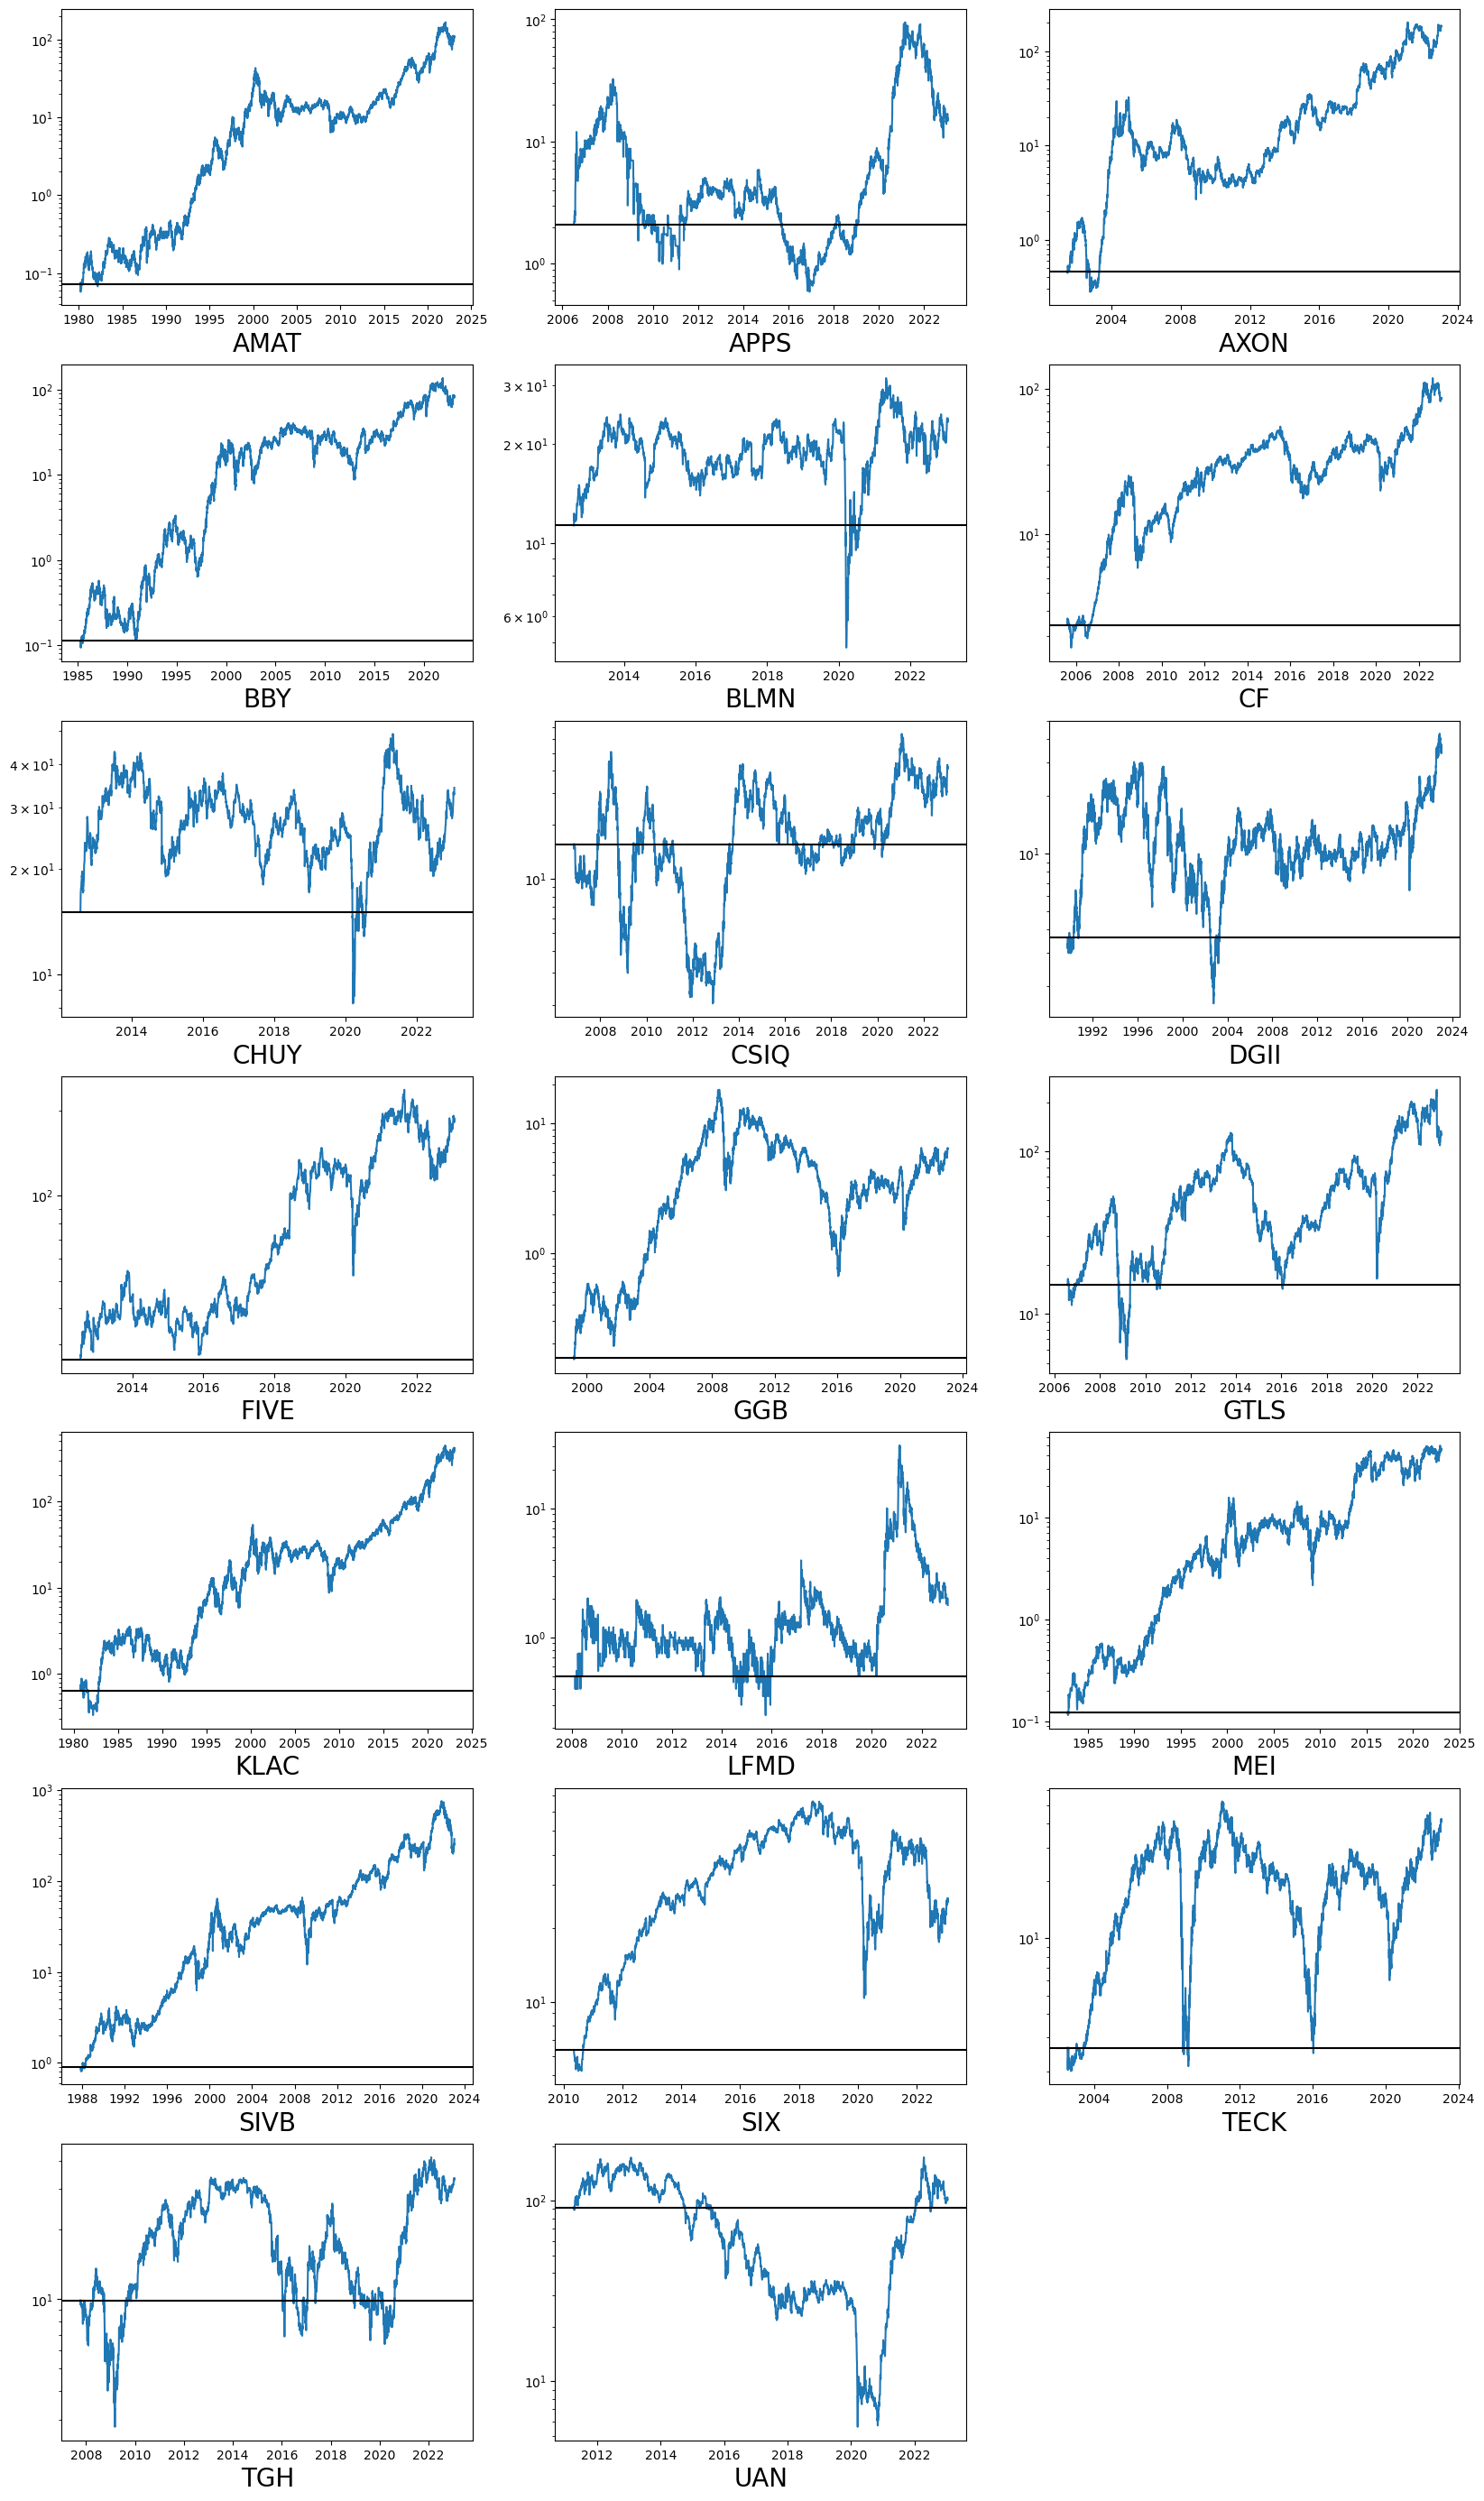

In [29]:
plt.rc('axes', labelsize=20)
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    x = data[sym]
    x = x[x.notnull()]
    plt.subplot(7, 3, i + 1)
    plt.plot(x)
    plt.axhline(y=x[0], color='k')
    plt.xlabel(sym)
    plt.yscale('log');

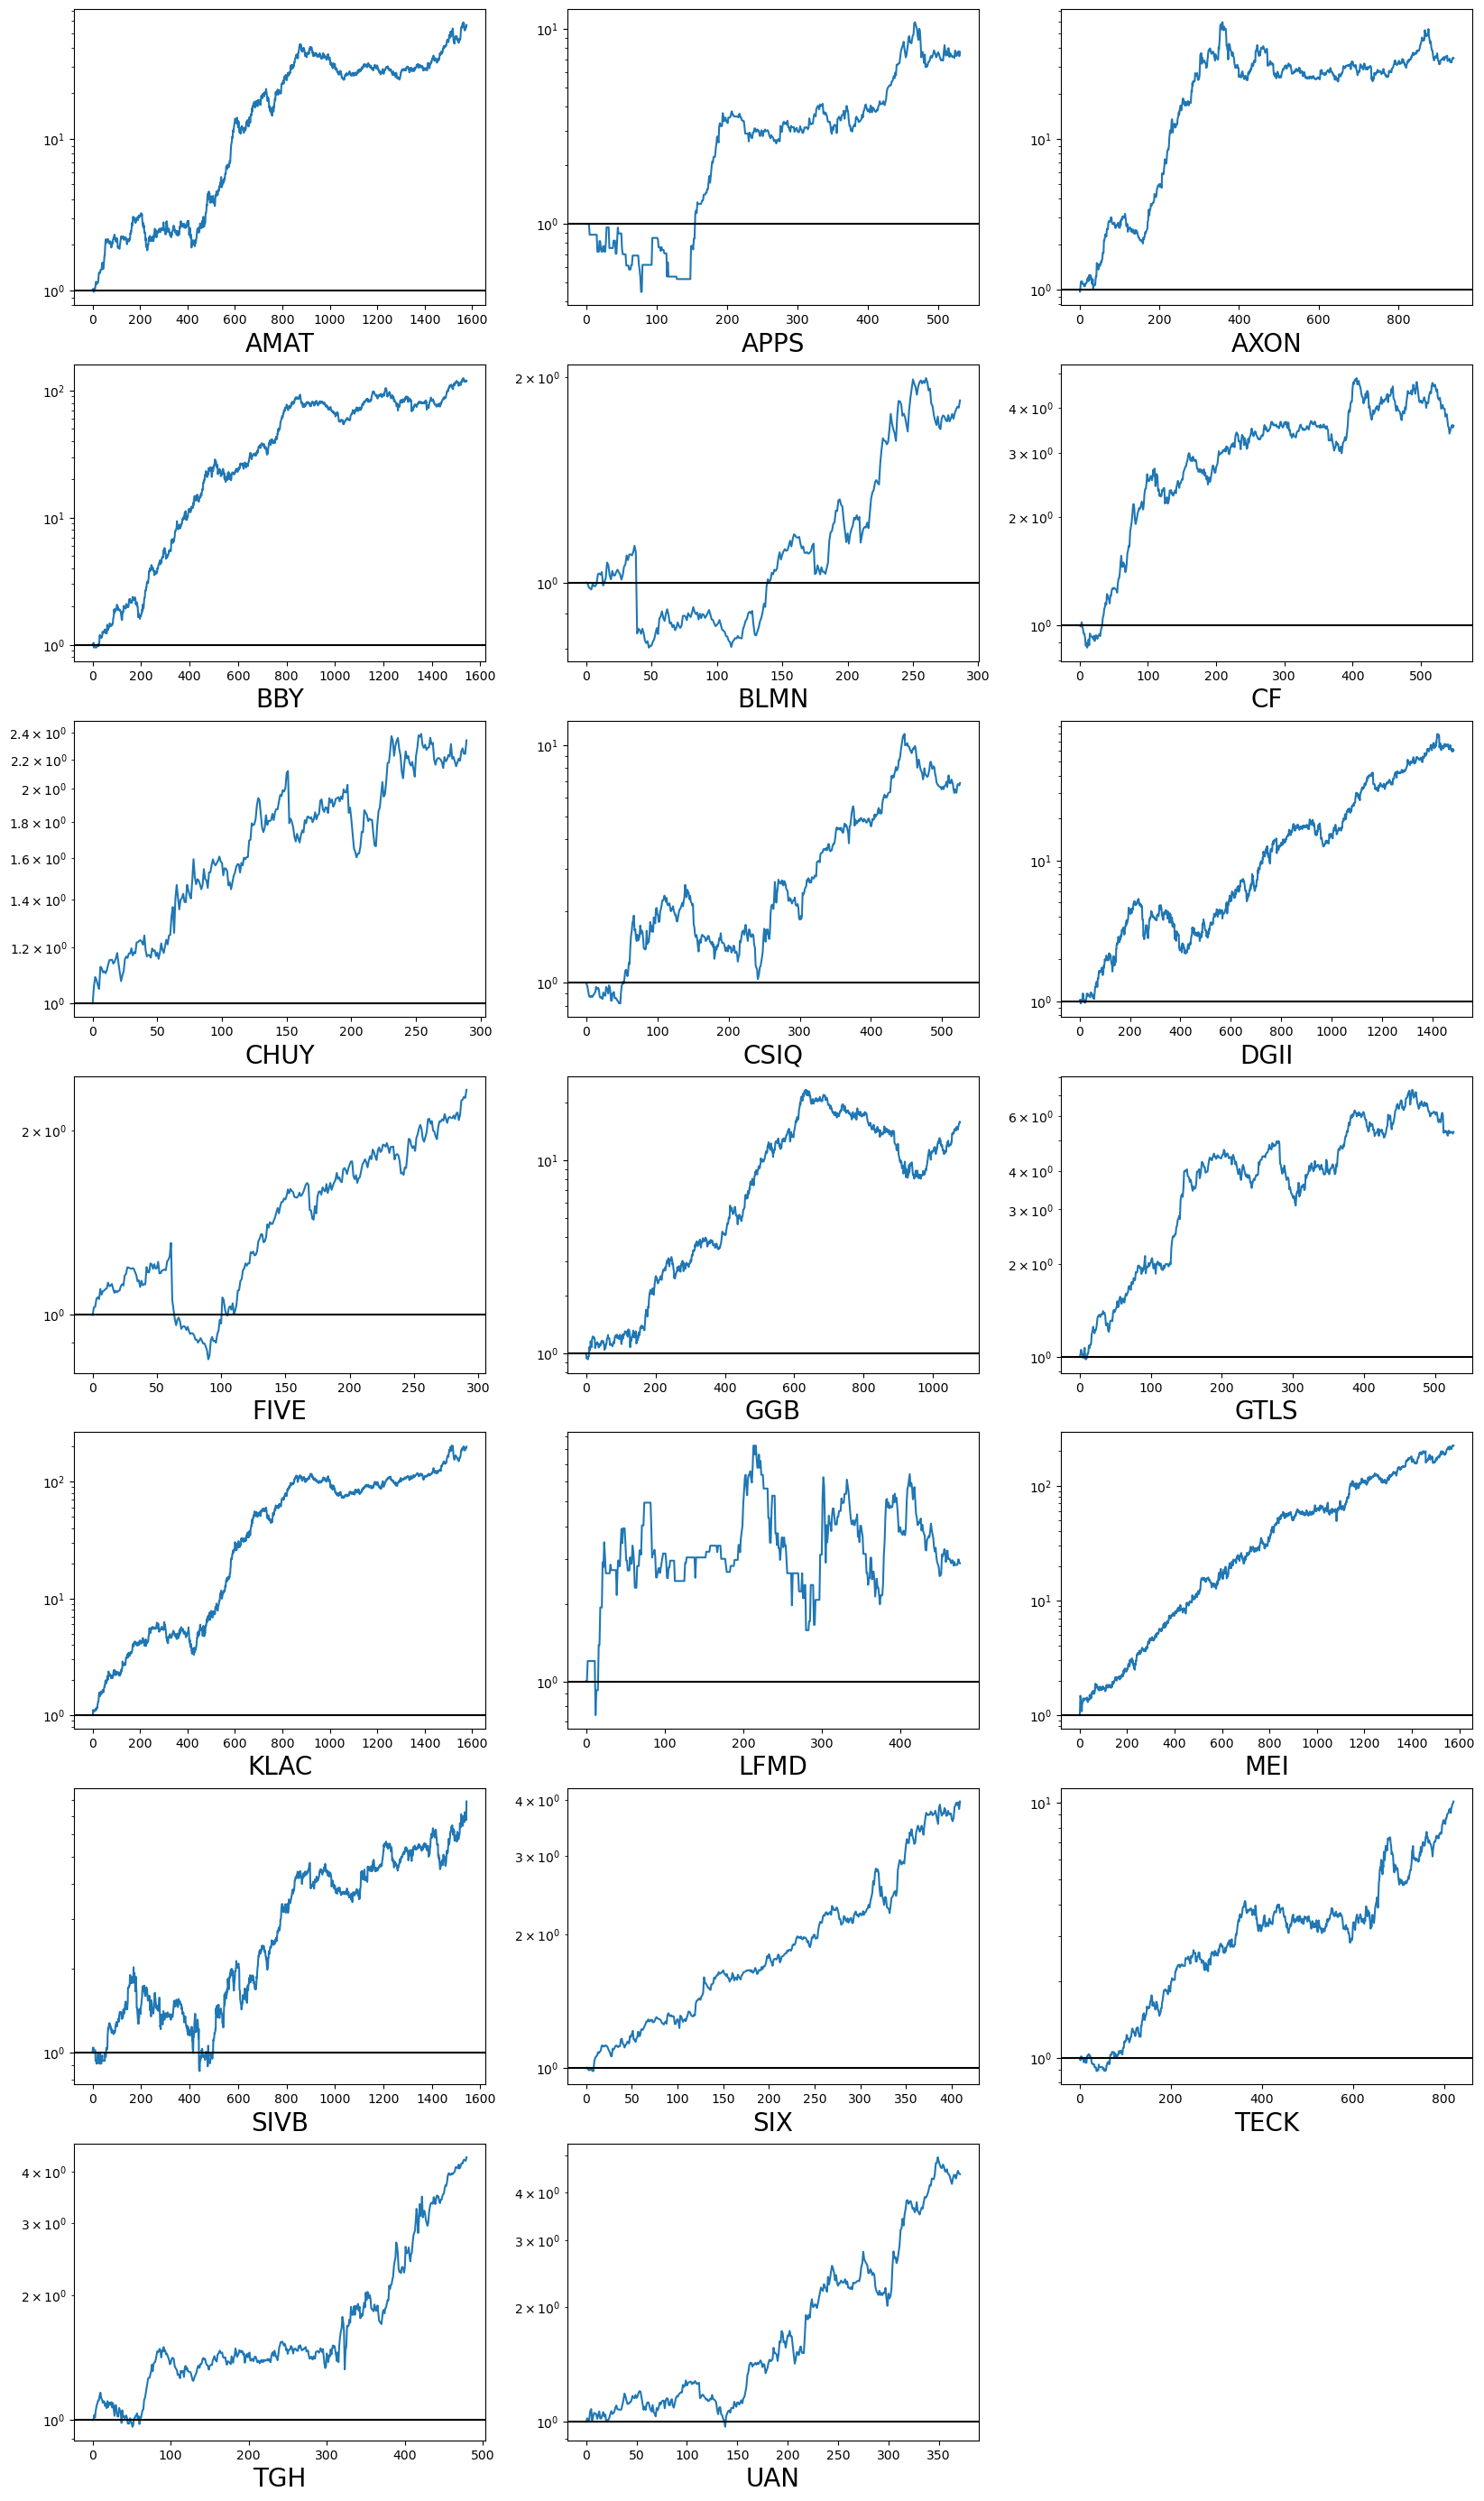

In [38]:
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    plt.subplot(7, 3, i + 1)
    dr = get_daily_returns(data[sym])
    dr = dr[data.state == CURRENT_STATE]
    dr = dr[dr.notnull()]
    dr = (dr + 1).to_numpy()
    dr = np.array([1] + list(dr))
    plt.plot(dr.cumprod())
    plt.axhline(y=dr[0], color='k')
    plt.yscale('log')
    plt.xlabel(sym);

In [31]:
holdings = pd.read_csv(
    '~/Downloads/Holdings - Damian Satterthwaite-Phillips(1).csv',
    usecols=['Symbol', 'Value'],
    index_col=0
).rename(columns={'Value': 'holdings'})
holdings.holdings = holdings.holdings.apply(
    lambda x: round(float(x.replace('$', '').replace(',', ''))))
holdings.head()

,holdings
Symbol,
AMRC,3643
CEF,0
CLW,3737
COOP,3634
CSIQ,2849


In [34]:
DOLLAR_AMT = 100_700
FRAC_IN = 0.6951
current = df.loc[best_weighted]
current['w'] = (current.weighted - 1) 
current.w = current.w / current.w.sum()
current['amt'] = (DOLLAR_AMT * FRAC_IN * current.w).round().astype(int)
current = pd.concat([current, holdings], axis=1)
current[['amt', 'holdings']] = current[['amt', 'holdings']].fillna(0).astype(int)
current['diff'] = current.amt - current.holdings
current.sort_values('diff')

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted,w,amt,holdings,diff
TRGP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5145,-5145
TGLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5029,-5029
ZYXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4515,-4515
ESTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4366,-4366
VOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4320,-4320
LPLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4037,-4037
FSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3987,-3987
MTDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3947,-3947
CLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3737,-3737
AMRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3643,-3643
